<h2><b>Input : </b></h2>

*   train_microarray.csv
*   test_microarray.csv
*   suspect.csv
*   best_feature.pkl
*   rf_klasifikasi.pkl
*   ab_klasifikasi.pkl

<h2><b>Output : </b></h2>

*   test_microarray_prediksi.csv
*   suspect_prediksi.csv

# Run All

## Import dan Load

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import metrics

import joblib

In [2]:
df_train = pd.read_csv('https://drive.google.com/uc?id=1_r9KdY3hz2zVtCD6VZs2nHrnXBGbia8v')
df_test = pd.read_csv('https://drive.google.com/uc?id=1MLHK9Ztyc2jgcN9h3jxBshKmyg10AGQj')
df_suspect = pd.read_csv('https://drive.google.com/uc?id=1QVbwJZlaSkN0T77OlOucnJzy7MYJjE0R')

In [3]:
best_feature = joblib.load('best_feature.pkl')
rf_klasifikasi = joblib.load('rf_klasifikasi.pkl')
ab_klasifikasi = joblib.load('ab_klasifikasi.pkl')

In [4]:
df_train = df_train[best_feature]
df_test = df_test[best_feature]
df_suspect = df_suspect[best_feature[:-1]]

### Data Train

In [5]:
df_train.head()

,210168_at,203413_at,214261_s_at,220389_at,210764_s_at,219957_at,215268_at,206683_at,202733_at,205543_at,...,205033_s_at,220791_x_at,218503_at,218273_s_at,206932_at,210064_s_at,204186_s_at,218668_s_at,208974_x_at,Label
0,2.698125,3.107873,2.834662,2.747929,2.817337,2.451694,1.827054,2.040676,2.949281,2.232630,...,2.368650,1.647203,3.025496,2.299563,2.810588,3.133350,2.548400,1.826488,2.972731,1.0
1,2.293900,2.672588,2.611291,3.009061,2.488425,2.398550,1.770540,1.879630,2.828378,2.199190,...,2.405635,1.699744,2.865492,2.174772,2.880740,3.232288,2.554832,1.746584,2.977777,0.0
2,2.399431,2.889090,2.605791,2.725291,2.502083,2.261000,1.637672,2.140230,2.841831,2.183796,...,2.391431,1.655388,2.870142,2.840631,2.677821,3.201589,2.309634,1.790644,3.105394,1.0
3,2.521457,2.645042,2.810516,2.631073,2.548259,2.265628,1.747258,1.896786,2.686695,1.774922,...,2.473243,1.864080,2.799175,2.199311,2.470905,2.653567,2.130495,1.829052,2.540820,1.0
4,2.155440,2.668677,2.699370,2.921175,2.480769,2.531731,1.778198,2.009543,2.823255,2.113964,...,2.294168,1.755021,2.925871,2.149401,2.630203,3.000877,2.437506,1.727929,2.850195,0.0


In [6]:
df_train.shape

(130, 25)

### Data Test

In [7]:
df_test.head()

,210168_at,203413_at,214261_s_at,220389_at,210764_s_at,219957_at,215268_at,206683_at,202733_at,205543_at,...,205033_s_at,220791_x_at,218503_at,218273_s_at,206932_at,210064_s_at,204186_s_at,218668_s_at,208974_x_at,Label
0,3.043402,3.094139,2.794017,2.490394,2.486882,2.582262,1.782106,1.992145,2.936268,2.210310,...,2.304051,1.670308,2.927293,2.227625,2.506433,2.897552,2.666978,1.704034,2.959310,1.0
1,2.322518,2.920028,2.705870,2.596790,2.731231,2.300361,1.748918,2.292365,2.937561,2.403534,...,2.229554,1.638874,2.991877,2.318759,2.620999,3.173006,2.540455,2.087062,3.053034,1.0
2,2.213548,2.803269,2.774272,2.943728,2.428869,2.537823,1.814363,1.902966,2.852805,2.178776,...,2.216565,1.739424,2.939931,2.210893,2.747734,3.186680,2.510518,1.867349,2.926784,0.0
3,3.005533,3.049637,2.792700,2.591582,2.912875,2.553905,1.917229,1.964053,2.907518,2.209711,...,2.691370,1.683082,2.990019,2.277165,2.628057,3.172613,2.548950,1.716799,2.828593,1.0
4,2.327932,2.955821,2.751823,2.990600,2.589540,2.481280,1.723384,1.810882,2.882731,2.072817,...,2.310722,1.716292,2.879399,2.286070,2.986100,3.222281,2.432459,1.729676,2.898261,1.0


In [8]:
df_test.shape

(57, 25)

### Suspect

In [9]:
df_suspect

,210168_at,203413_at,214261_s_at,220389_at,210764_s_at,219957_at,215268_at,206683_at,202733_at,205543_at,...,203932_at,205033_s_at,220791_x_at,218503_at,218273_s_at,206932_at,210064_s_at,204186_s_at,218668_s_at,208974_x_at
0,2.456140,2.758882,2.776141,2.676786,2.605751,2.376066,1.488812,1.734446,2.705895,2.196757,...,2.946977,2.627903,1.913066,2.875990,2.284214,2.355247,2.740593,2.251987,1.798481,2.640529
1,2.666058,2.742488,2.796186,2.582002,2.725797,2.528506,1.753553,1.855999,2.672903,2.211044,...,2.791743,2.444026,1.958544,2.607342,2.540094,2.475522,2.703137,2.216733,1.758443,2.435080
2,2.749327,2.964329,2.792791,2.679559,2.639700,2.356858,1.659130,1.854442,2.576834,2.260099,...,2.797847,2.414166,2.109038,2.693889,2.489445,2.574849,2.887008,2.283633,1.643051,2.680064
3,2.590253,2.774002,2.821499,2.505272,2.546899,2.407314,1.816837,1.739256,2.621353,2.032483,...,2.940868,2.437363,1.981175,2.661584,2.446184,2.468811,2.749924,2.096438,1.646837,2.924644
4,2.549438,2.780619,2.746490,2.520255,2.516105,2.278908,1.729066,1.970529,2.807667,2.186791,...,2.768953,2.490819,1.884521,2.825390,2.326603,2.529673,2.855790,1.988793,1.888327,2.866276


In [10]:
df_suspect.shape

(5, 24)

## X_train, y_train, X_test, y_test

In [11]:
X_train = df_train.iloc[:,:-1]
X_train.head()

,210168_at,203413_at,214261_s_at,220389_at,210764_s_at,219957_at,215268_at,206683_at,202733_at,205543_at,...,203932_at,205033_s_at,220791_x_at,218503_at,218273_s_at,206932_at,210064_s_at,204186_s_at,218668_s_at,208974_x_at
0,2.698125,3.107873,2.834662,2.747929,2.817337,2.451694,1.827054,2.040676,2.949281,2.232630,...,3.040835,2.368650,1.647203,3.025496,2.299563,2.810588,3.133350,2.548400,1.826488,2.972731
1,2.293900,2.672588,2.611291,3.009061,2.488425,2.398550,1.770540,1.879630,2.828378,2.199190,...,2.935364,2.405635,1.699744,2.865492,2.174772,2.880740,3.232288,2.554832,1.746584,2.977777
2,2.399431,2.889090,2.605791,2.725291,2.502083,2.261000,1.637672,2.140230,2.841831,2.183796,...,2.823873,2.391431,1.655388,2.870142,2.840631,2.677821,3.201589,2.309634,1.790644,3.105394
3,2.521457,2.645042,2.810516,2.631073,2.548259,2.265628,1.747258,1.896786,2.686695,1.774922,...,2.970504,2.473243,1.864080,2.799175,2.199311,2.470905,2.653567,2.130495,1.829052,2.540820
4,2.155440,2.668677,2.699370,2.921175,2.480769,2.531731,1.778198,2.009543,2.823255,2.113964,...,3.061268,2.294168,1.755021,2.925871,2.149401,2.630203,3.000877,2.437506,1.727929,2.850195


In [12]:
y_train = df_train.iloc[:,-1]
y_train.head()

0    1.0
1    0.0
2    1.0
3    1.0
4    0.0
Name: Label, dtype: float64

In [13]:
X_test = df_test.iloc[:,:-1]
X_test.head()

,210168_at,203413_at,214261_s_at,220389_at,210764_s_at,219957_at,215268_at,206683_at,202733_at,205543_at,...,203932_at,205033_s_at,220791_x_at,218503_at,218273_s_at,206932_at,210064_s_at,204186_s_at,218668_s_at,208974_x_at
0,3.043402,3.094139,2.794017,2.490394,2.486882,2.582262,1.782106,1.992145,2.936268,2.210310,...,3.050812,2.304051,1.670308,2.927293,2.227625,2.506433,2.897552,2.666978,1.704034,2.959310
1,2.322518,2.920028,2.705870,2.596790,2.731231,2.300361,1.748918,2.292365,2.937561,2.403534,...,3.049715,2.229554,1.638874,2.991877,2.318759,2.620999,3.173006,2.540455,2.087062,3.053034
2,2.213548,2.803269,2.774272,2.943728,2.428869,2.537823,1.814363,1.902966,2.852805,2.178776,...,3.010123,2.216565,1.739424,2.939931,2.210893,2.747734,3.186680,2.510518,1.867349,2.926784
3,3.005533,3.049637,2.792700,2.591582,2.912875,2.553905,1.917229,1.964053,2.907518,2.209711,...,2.848926,2.691370,1.683082,2.990019,2.277165,2.628057,3.172613,2.548950,1.716799,2.828593
4,2.327932,2.955821,2.751823,2.990600,2.589540,2.481280,1.723384,1.810882,2.882731,2.072817,...,2.659267,2.310722,1.716292,2.879399,2.286070,2.986100,3.222281,2.432459,1.729676,2.898261


In [14]:
y_test = df_test.iloc[:,-1]
y_test.head()

0    1.0
1    1.0
2    0.0
3    1.0
4    1.0
Name: Label, dtype: float64

## Validasi

### Random Forest

In [15]:
rf_klasifikasi.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_split=4, n_estimators=50)

In [16]:
rf_prediksi = rf_klasifikasi.predict(X_test)
print("Accuracy : ", metrics.accuracy_score(y_test, rf_prediksi))
print("Precision: ", metrics.precision_score(y_test, rf_prediksi))
print("Recall   : ", metrics.recall_score(y_test, rf_prediksi))
print("F1 Score : ", metrics.f1_score(y_test, rf_prediksi))

Accuracy :  0.7192982456140351
Precision:  0.7058823529411765
Recall   :  0.8
F1 Score :  0.7500000000000001


[Text(0, 0.5, '1'), Text(0, 1.5, '0')]

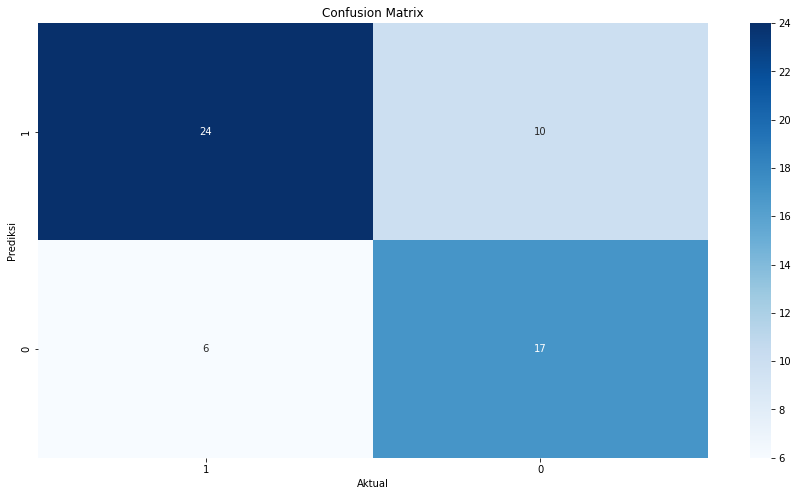

In [17]:
cf_matrix = metrics.confusion_matrix(y_test, rf_prediksi, labels=[1,0]).transpose()

plt.figure(figsize=(15,8))
ax = plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', ax=ax)
ax.set_xlabel('Aktual')
ax.set_ylabel('Prediksi')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(['1', '0'])
ax.yaxis.set_ticklabels(['1', '0'])

### AdaBoost

In [18]:
ab_klasifikasi.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=150)

In [19]:
ab_prediksi = ab_klasifikasi.predict(X_test)
print("Accuracy : ", metrics.accuracy_score(y_test, ab_prediksi))
print("Precision: ", metrics.precision_score(y_test, ab_prediksi))
print("Recall   : ", metrics.recall_score(y_test, ab_prediksi))
print("F1 Score : ", metrics.f1_score(y_test, ab_prediksi))

Accuracy :  0.7894736842105263
Precision:  0.7647058823529411
Recall   :  0.8666666666666667
F1 Score :  0.8125


[Text(0, 0.5, '1'), Text(0, 1.5, '0')]

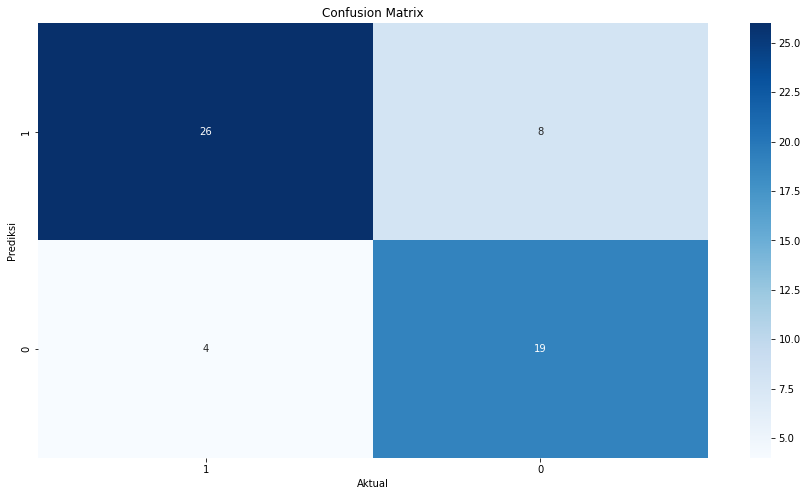

In [20]:
cf_matrix = metrics.confusion_matrix(y_test, ab_prediksi, labels=[1,0]).transpose()

plt.figure(figsize=(15,8))
ax = plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', ax=ax)
ax.set_xlabel('Aktual')
ax.set_ylabel('Prediksi')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(['1', '0'])
ax.yaxis.set_ticklabels(['1', '0'])

## Export

### Data Test

In [21]:
df_test['Random Forest'] = rf_prediksi
df_test['AdaBoost'] = ab_prediksi
df_test.head()

,210168_at,203413_at,214261_s_at,220389_at,210764_s_at,219957_at,215268_at,206683_at,202733_at,205543_at,...,218503_at,218273_s_at,206932_at,210064_s_at,204186_s_at,218668_s_at,208974_x_at,Label,Random Forest,AdaBoost
0,3.043402,3.094139,2.794017,2.490394,2.486882,2.582262,1.782106,1.992145,2.936268,2.210310,...,2.927293,2.227625,2.506433,2.897552,2.666978,1.704034,2.959310,1.0,1.0,1.0
1,2.322518,2.920028,2.705870,2.596790,2.731231,2.300361,1.748918,2.292365,2.937561,2.403534,...,2.991877,2.318759,2.620999,3.173006,2.540455,2.087062,3.053034,1.0,1.0,1.0
2,2.213548,2.803269,2.774272,2.943728,2.428869,2.537823,1.814363,1.902966,2.852805,2.178776,...,2.939931,2.210893,2.747734,3.186680,2.510518,1.867349,2.926784,0.0,0.0,0.0
3,3.005533,3.049637,2.792700,2.591582,2.912875,2.553905,1.917229,1.964053,2.907518,2.209711,...,2.990019,2.277165,2.628057,3.172613,2.548950,1.716799,2.828593,1.0,1.0,1.0
4,2.327932,2.955821,2.751823,2.990600,2.589540,2.481280,1.723384,1.810882,2.882731,2.072817,...,2.879399,2.286070,2.986100,3.222281,2.432459,1.729676,2.898261,1.0,0.0,0.0


In [22]:
df_test.to_csv(r'test_microarray_prediksi.csv', index=False, header=True)

### Suspect

In [23]:
X_suspect = df_suspect
X_suspect

,210168_at,203413_at,214261_s_at,220389_at,210764_s_at,219957_at,215268_at,206683_at,202733_at,205543_at,...,203932_at,205033_s_at,220791_x_at,218503_at,218273_s_at,206932_at,210064_s_at,204186_s_at,218668_s_at,208974_x_at
0,2.456140,2.758882,2.776141,2.676786,2.605751,2.376066,1.488812,1.734446,2.705895,2.196757,...,2.946977,2.627903,1.913066,2.875990,2.284214,2.355247,2.740593,2.251987,1.798481,2.640529
1,2.666058,2.742488,2.796186,2.582002,2.725797,2.528506,1.753553,1.855999,2.672903,2.211044,...,2.791743,2.444026,1.958544,2.607342,2.540094,2.475522,2.703137,2.216733,1.758443,2.435080
2,2.749327,2.964329,2.792791,2.679559,2.639700,2.356858,1.659130,1.854442,2.576834,2.260099,...,2.797847,2.414166,2.109038,2.693889,2.489445,2.574849,2.887008,2.283633,1.643051,2.680064
3,2.590253,2.774002,2.821499,2.505272,2.546899,2.407314,1.816837,1.739256,2.621353,2.032483,...,2.940868,2.437363,1.981175,2.661584,2.446184,2.468811,2.749924,2.096438,1.646837,2.924644
4,2.549438,2.780619,2.746490,2.520255,2.516105,2.278908,1.729066,1.970529,2.807667,2.186791,...,2.768953,2.490819,1.884521,2.825390,2.326603,2.529673,2.855790,1.988793,1.888327,2.866276


In [24]:
rf_klasifikasi.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_split=4, n_estimators=50)

In [25]:
ab_klasifikasi.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=150)

In [26]:
rf_prediksi_suspect = rf_klasifikasi.predict(X_suspect)
ab_prediksi_suspect = ab_klasifikasi.predict(X_suspect)

In [27]:
df_suspect['Random Forest'] = rf_prediksi_suspect
df_suspect['AdaBoost'] = ab_prediksi_suspect
df_suspect.head()

,210168_at,203413_at,214261_s_at,220389_at,210764_s_at,219957_at,215268_at,206683_at,202733_at,205543_at,...,220791_x_at,218503_at,218273_s_at,206932_at,210064_s_at,204186_s_at,218668_s_at,208974_x_at,Random Forest,AdaBoost
0,2.456140,2.758882,2.776141,2.676786,2.605751,2.376066,1.488812,1.734446,2.705895,2.196757,...,1.913066,2.875990,2.284214,2.355247,2.740593,2.251987,1.798481,2.640529,1.0,1.0
1,2.666058,2.742488,2.796186,2.582002,2.725797,2.528506,1.753553,1.855999,2.672903,2.211044,...,1.958544,2.607342,2.540094,2.475522,2.703137,2.216733,1.758443,2.435080,1.0,1.0
2,2.749327,2.964329,2.792791,2.679559,2.639700,2.356858,1.659130,1.854442,2.576834,2.260099,...,2.109038,2.693889,2.489445,2.574849,2.887008,2.283633,1.643051,2.680064,1.0,1.0
3,2.590253,2.774002,2.821499,2.505272,2.546899,2.407314,1.816837,1.739256,2.621353,2.032483,...,1.981175,2.661584,2.446184,2.468811,2.749924,2.096438,1.646837,2.924644,1.0,1.0
4,2.549438,2.780619,2.746490,2.520255,2.516105,2.278908,1.729066,1.970529,2.807667,2.186791,...,1.884521,2.825390,2.326603,2.529673,2.855790,1.988793,1.888327,2.866276,1.0,1.0


In [28]:
df_suspect.to_csv(r'suspect_prediksi.csv', index=False, header=True)